<a href="https://colab.research.google.com/github/Fatemeh-Msh/Advanced-Forecasting-Techniques-Project/blob/main/NOTEBOOK/Retail_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Retail Demand Prediction**

##**EXECUTIVE SUMMARY**

This project examined weekly sales data from several retail stores to understand how different forecasting models behave when real business patterns are involved. The first step was to look at the yearly rhythm in the data, which appeared very clearly and already made the simple Seasonal Naive model perform better than expected. After that, the SARIMAX model showed stronger and more stable results because it included economic factors such as unemployment, CPI, fuel price, temperature and holidays. These variables helped the forecasts react to changes that were not purely seasonal, and the overall errors across stores remained low.

Deep learning models were also tested. The LSTM worked nicely for Store 1 but showed uneven accuracy when applied across all stores. The GRU models performed more consistently, and the GRU-12 version gave the best accuracy in the whole project, even slightly ahead of SARIMAX. A longer history (GRU-26) did not improve the results, probably because the amount of data per store was limited.

All in all, the results suggest that when we need clear interpretation and stable accuracy, SARIMAX model is good for us, but GRU-12 is more suitable when the priority is achieving the lowest possible error. The study also shows how much weekly retail demand depends on seasonality and economic conditions.


##**1 - INTRODUCTION**

###**1-1	BACKGROUND: RETAIL DEMAND FORECASTING**

Retail demand forecasting helps stores to see that how their weekly sales action during the year. In many retail studies, sales usually rise and fall with seasons, holidays, and changes in prices or local conditions (Neba et al., 2024; Malik et al., 2024). In our data, this pattern also appears clearly. The Seasonal Naive model already gives a strong baseline, which shows that the weekly sales follow a repeated yearly cycle.

###**1-2	WHY FORECASTING WEEKLY SALES MATTERS**

Knowing the expected sales for each week helps stores organise their work more calmly. When they have an idea of the coming demand, they can order products on time and avoid empty shelves or extra stock. Earlier research in retail also points out that short-term forecasts make everyday decisions—like planning staff or preparing for busy periods—much easier.

###**1-3	PROJECT OBJECTIVE**

The main goal of this project is to see how well different forecasting models can predict weekly sales for several Walmart stores. We work with both simple and more advanced methods to understand how each one handles seasonal changes and the effect of economic variables. By comparing their results on the same dataset, the project aims to find which approach gives the most reliable short-term forecasts for practical retail use.

###**1-4	MODELS INCLUDED IN THIS STUDY**

In this project, four forecasting models are used so we can compare simple and more complex ways of predicting weekly sales. The Seasonal Naive model acts as the basic reference, since it repeats last year’s value and helps us judge whether other models actually improve the forecast. SARIMAX is added because it can work with seasonality and also include factors like holidays or economic indicators. Alongside these, two neural-network models, LSTM and GRU, are tested to see how well they capture patterns that do not follow a clear or regular shape. By looking at the results of all four models on the same data, we get a clearer picture of their strengths and limits.

##**2 - DATA DESCRIPTION & EXPLORATION**

###**2-1	DATASET ORIGIN AND STRUCTURE**

The dataset we used is including of weekly sales records collected from several retail stores, provided in a CSV format as you can see the first 3 rows of this dataset in TABLE I. Every rows show the sales of a specific store for a given week. Along with sales figures, the data also includes several external factors such as temperature, fuel price, unemployment rate, and the CPI. These additional features help capture the influence of economic and environmental conditions, which can be important for models that respond to such variations.

---

###**TABLE I. FIRST 3 ROWS OF WALMART DATASET**

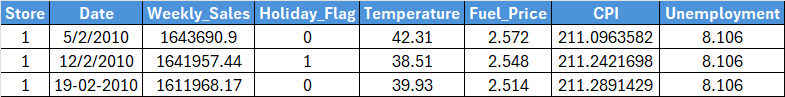


---



###**2-2	VARIABLES INCLUDED**

As shown in table I., the dataset contains several columns that describe the weekly activity of each store. **Weekly_Sales** is the main value analysed in this project, as it shows how much revenue each store generated in a given week. Alongside this, the file includes a group of external features that help explain changes in demand. These are **Holiday_Flag**, **Temperature**, **Fuel_Price**, **CPI**, and **Unemployment**. Each of these factors reflects conditions that can influence customer behaviour, such as special events, weather, fuel costs, general price levels, or local labour conditions. Together, these variables provide a fuller picture of what may drive week-to-week sales movements.

###**2-3	TIME RANGE, FREQUENCY, NUMBER OF STORES**

The records in our dataset starts in February 2010 and continue until November 2012. Each stores follow the same timeline, so their observations are aligned and comparable. After parsing the dates, the data was set to a weekly frequency ending on Fridays, which matches the structure of the original file. The dataset covers multiple store locations, each identified by a store number, and every store contributes its own series of weekly sales and external factors.

###**2-4	DATA CLEANING AND INITIAL EXPLORATION**

After loading the Walmart dataset, the first step is putting the dates into a proper weekly format and sort the rows for each store. The data of a few weeks were missing in the raw dataset, so a regular weekly index was created and the gaps were filled using time-based interpolation. This helped keep the general shape of the series without creating unusual jumps. For the external variables, forward and backward fills were used only when a short section had no recorded value.

When the cleaned data was checked, it became clear that most variables were complete and only a small number of entries needed adjustment. Some very high sales values appeared around holiday periods, but these were not removed because they reflect real behaviour in retail chains. The weekly plots also showed a repeated yearly pattern, with stronger sales near the end of the year and calmer periods in other months. This kind of stable cycle explains why even simple seasonal models perform reasonably well.

The external features also changed gradually from week to week, without major breaks. Because of this, they were kept in the dataset for models that can use additional information, such as SARIMAX and the neural-network-based approaches. Overall, these steps created a clean and organised dataset that was ready for modelling.






##**3 - PROBLEM DEFINITION**

The models in this project are designed to estimate how far ahead weekly sales can be predicted in a reliable way and how these forecasts can support practical retail decisions. The main focus is on forecasting a fixed horizon of future weeks, which allows managers to plan stock levels, staffing and promotional activity with enough time for action.

The forecasting task uses Weekly_Sales as the target, while several external variables act as inputs. These include **Holiday_Flag, Temperature, Fuel_Price, CPI, and Unemployment**, all of which appeared to move together with changes seen in the sales data. Since these factors can influence customer behaviour, the models work with more than one input at the same time. For this reason, the problem is treated as a **multivariate forecast**, not a simple univariate one.
To test the models fairly, the data for each store was split into a training part and a testing part, where the last 52 weeks were kept aside for evaluation. This split matches the yearly cycle seen in the dataset and helps check whether the models can generalise to new periods. Model accuracy was measured using **MAE, RMSE and MAPE**, as these metrics highlight different types of errors and are commonly used in retail forecasting research. Together, these elements define the forecasting task and provide a clear basis for comparing the models in the next sections.


##**4 - FORECASTING MODELS AND RESULTS**

###**4-1	BASELINE MODEL**

In this project, the simplest starting point for forecasting weekly sales was the Seasonal Naive model. This method sets each future value equal to the value from the same week one year earlier. As shown in FIGURE 4.1, our data follows a clear yearly pattern, so this model already performed reasonably well.

---
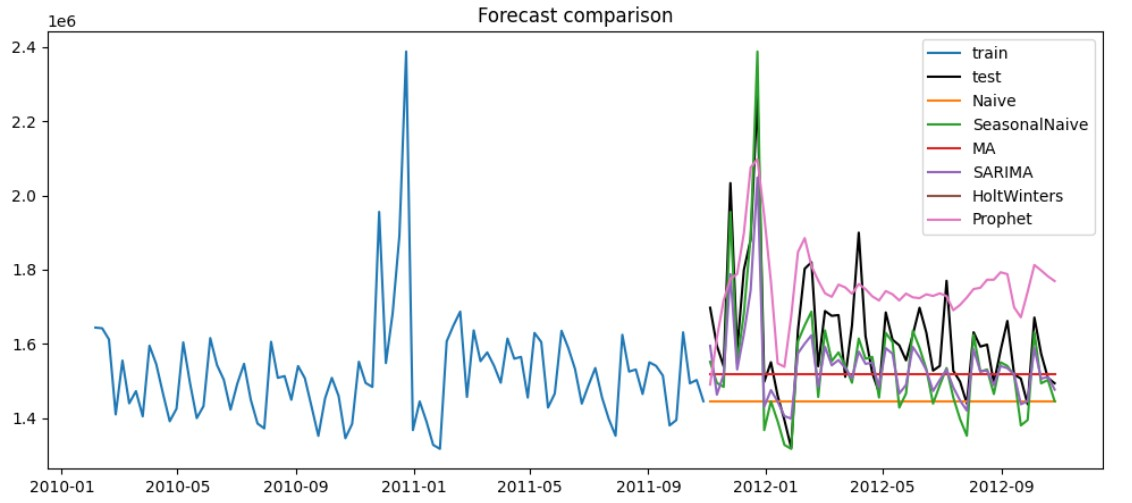

###**FIGURE 4.1. WEEKLY SALES FOR STORE 1 WITH BASELINE AND MODEL FORECASTS**
---

Also, we can see the results for Store 1 in TABLE II., the model reduced the MAE to about 79,000, while the basic “last observation” method produced a much higher error. This difference shows that the yearly cycle is genuinely present in the data and that ignoring it leads to much larger mistakes.

---
###**TABLE II. COMPARISON OF MAE RESULTS FOR BASELINE ACROSS 10 STORES**

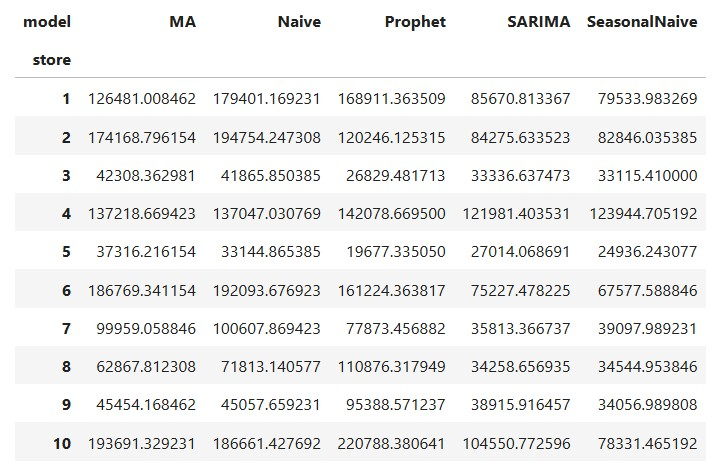

---

The model is not always the best choice, but for datasets where weekly patterns repeat each year, it provides an essential benchmark. Models that based on seasonality are often considered the foundation of research because they capture the basic behavior of the series without additional parameters (Sbrana & Silvestrini, 2025). This idea emerged in our project. This simple seasonal model performed well enough to raise expectations for more advanced models. If they could not at least match this level, their results would not be convincing.

In short, the Seasonal Naive model was not just a simple method. It acted as a mirror of the real data, helping us see how much of the weekly sales behaviour came from yearly repetition and which parts needed more sophisticated modelling.









###**4-2	CLASSICAL STATISTICAL MODEL**

In this project, SARIMAX served as the main classical model because it could address the two key characteristics of our data: the yearly seasonal cycle and the influence of external economic variables. Weekly retail sales rarely follow a perfectly repeated pattern from one year to the next, as changes in temperature, fuel prices, CPI, and unemployment shift consumer behaviour. A purely seasonal model cannot fully capture these effects. SARIMAX, by design, allows these external factors to be included, making it more suitable for retail data where economic conditions matter.

**Model setup in this project**

In the actual implementation, SARIMAX was estimated using auto_arima with a seasonal period of 52 weeks for Store 1. All available exogenous variables—Holiday_Flag, Temperature, Fuel_Price, CPI, and Unemployment—were included. The final results showed that SARIMAX was able to follow the structure of the series well, reducing the MAE to around 85,670. A similar pattern appears in the multi-store comparison (TABLE II), where SARIMAX consistently delivers one of the lowest errors after the Seasonal Naive model.

**Why SARIMAX was a good fit for this dataset**

First, the model captured the yearly cycle clearly. In FIGURE 4.2, the predicted line generally moves in the same direction as the real weekly values, showing that the seasonal component was correctly identified.

---
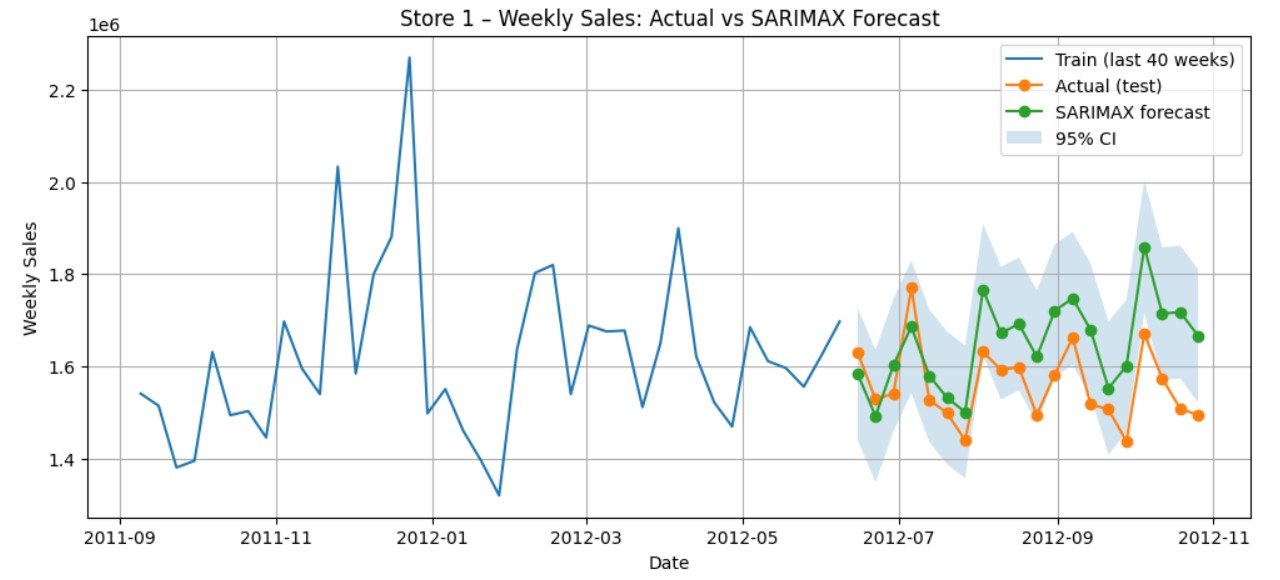

###**FIGURE 4.2. ACTUAL VS SARIMAX FORECAST (STORE 1)**
---

Second, the inclusion of exogenous variables helped the model react better to abrupt or irregular changes. FIGURE 4.3 shows that where the remaining errors are spread without a clear pattern. This indicates that the model captured the main structure of the series.

---
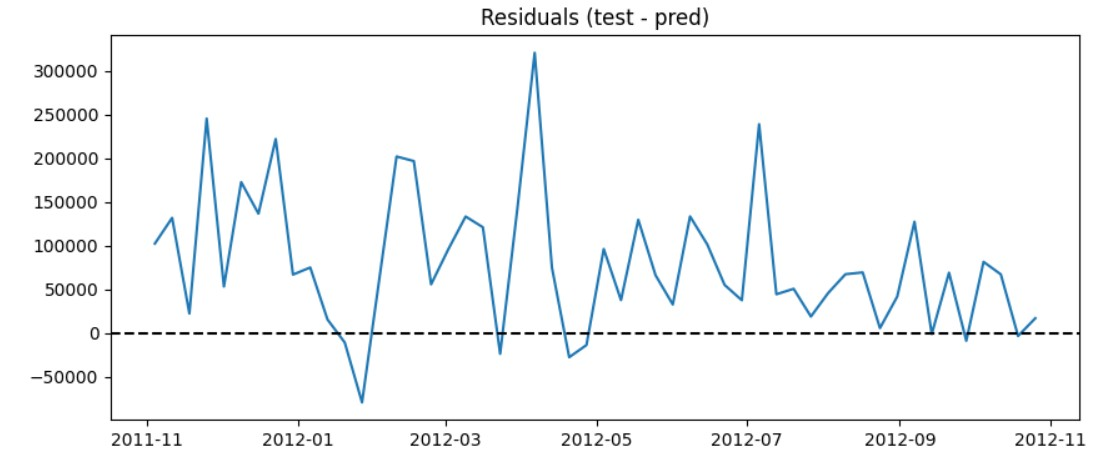

###**FIGURE 4.3. SARIMAX Residual Plot**
---

FIGURE 4.4, which shows the distribution of residuals, reinforces this point, as most errors are concentrated in a narrow range rather than spread widely.

---
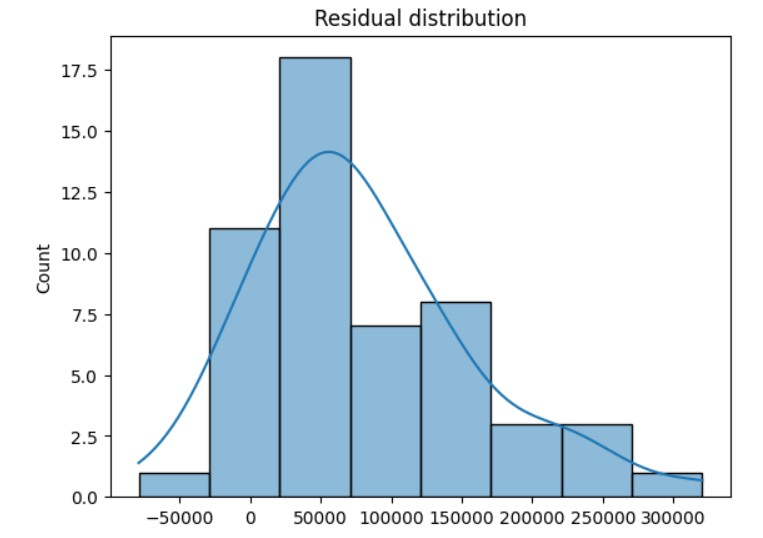

###**FIGURE 4.4. Residual Distribution (Histogram)**
---

Taken together, these figures show that SARIMAX not only captured the repeated yearly pattern but also handled shifts caused by economic conditions better than simpler approaches.


###**4-3	ADVANCED DEEP LEARNING MODELS**

In the last part of the project, I tested several recurrent neural network models on the same Walmart dataset. All models use weekly sequences of length 12 or 26, and the same six inputs as before, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, and Unemployment.
First, we trained an LSTM model for Store 1 only. The network takes the last 12 weeks of these six variables and predicts the sales for the next week. It has two LSTM layers with 64 hidden units and is trained on all history except the last 20 weeks, which are kept as the test set. On this store, the LSTM reached a MAPE of about 5.6%, slightly better than the SARIMAX result for the same store.

The test plot (FIGURE 4.5) shows that the LSTM line follows the main movements of weekly sales, but it is smoother and reacts less to sudden peaks.

---
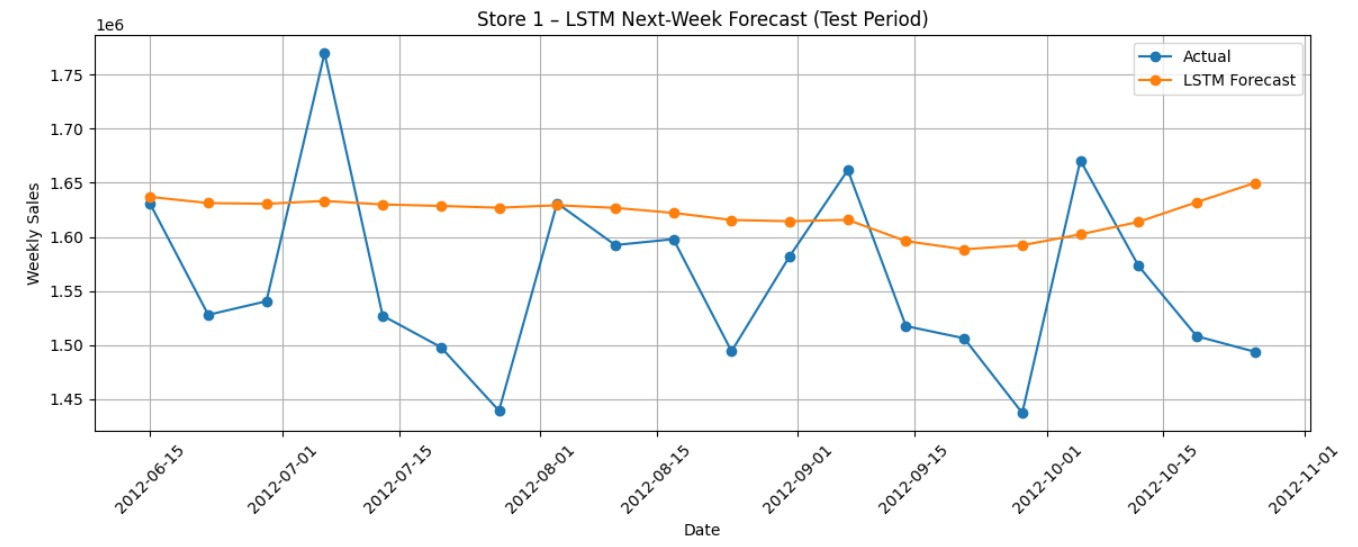

###**FIGURE 4.5. STORE 1 – LSTM NEXT-WEEK FORECAST, LAST 20 WEEKS**
---

After that, I moved to global GRU models that use data from all stores together instead of training a separate model per store. Two versions were tested:

**•	GRU-12: uses 12 weeks of history**

**•	GRU-26: uses 26 weeks of history**

Both models share the same structure, two GRU layers with 64 hidden units, followed by a linear layer that predicts next-week sales. The last 20 weeks of each store are used as test data. For each configuration, we built sequences across all stores and then trained a single network.

The GRU-12 model gave the best overall accuracy in the project. Across all stores, it reached an average MAPE of about 4.6%, which is lower than both SARIMAX (≈5.5%) and LSTM (≈6.8%). A sample of its test forecasts is shown in FIGURE 4.6.

---
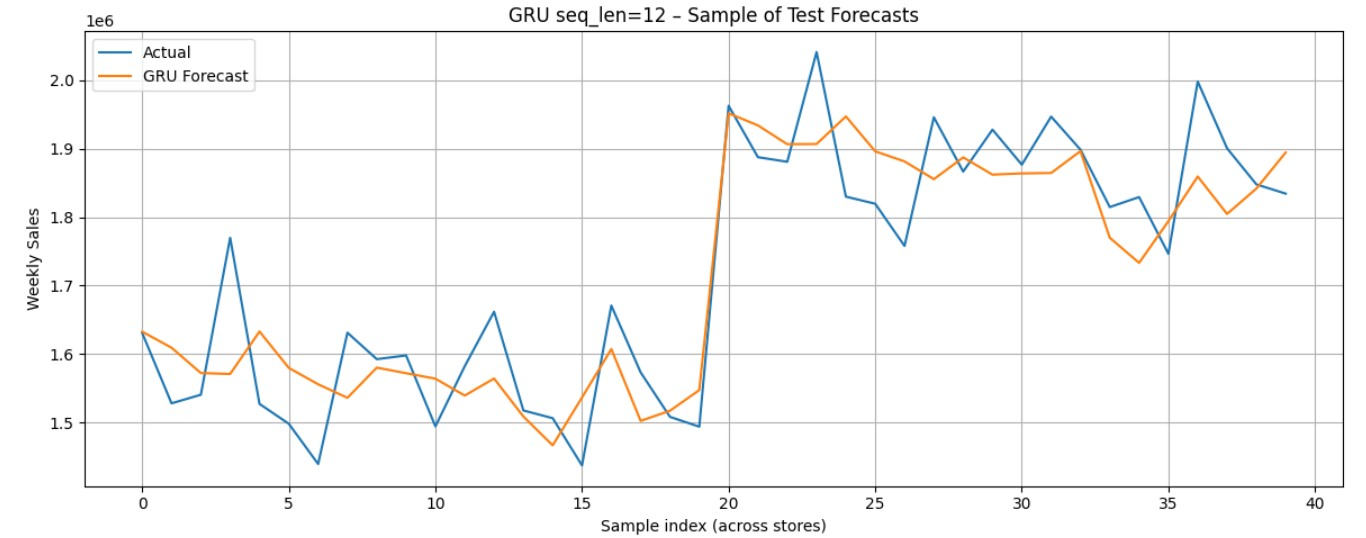

###**FIGURE 4.6. GRU-12 – SAMPLE TEST FORECASTS ACROSS STORES**
---

The lines for actual and predicted values are close, especially in normal weeks, which means the model captures short-term patterns well when it looks back over three months of data.
For GRU-26, the idea was to give the network a longer memory so it could use almost half a year of history. In practice, this did not improve the results. The average MAPE rised up to about 5.2%, slightly worse than GRU-12 and closer to SARIMAX. The test plot in FIGURE 4.7 shows that the model still follows the trend, but the advantage of the longer sequence is not clear. With limited per-store data, the extra complexity seems to make training harder without clear gains.

---
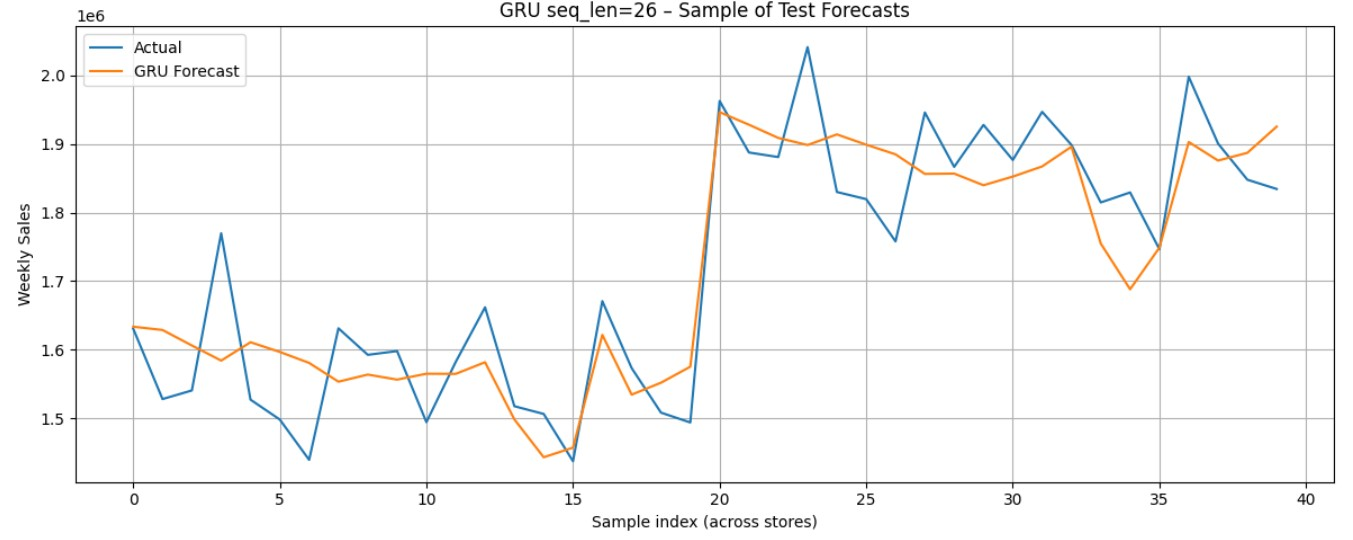

###**FIGURE 4.7. GRU-26 – SAMPLE TEST FORECASTS ACROSS STORES**
---

Across all stores, GRU-12 gives the lowest MAPE (4.55%), followed by GRU-26 (5.16%), SARIMAX (5.50%) and LSTM-12 (6.81%). This means that GRU-12 is the most accurate model in this project.

---
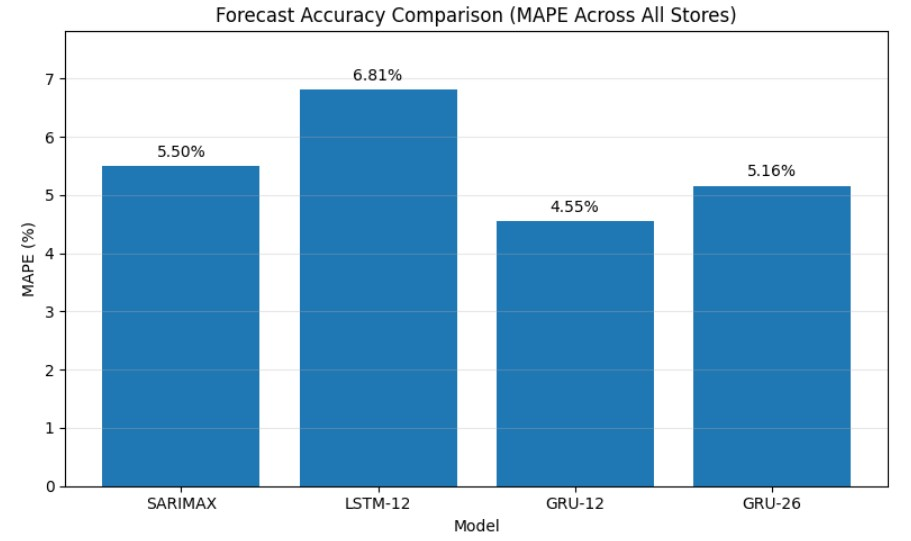

###**FIGURE 4.8. FORECAST ACCURACY COMPARISON, MAPE ACROSS ALL MODELS**



##**5	CONCLUSION**

In this project, we tested several forecasting models on the weekly sales data, and the results showed that each model has its own strengths. The simple Seasonal Naive model, even without using any extra information, made it clear that the yearly pattern in sales is strong and cannot be ignored. After that, the SARIMAX model performed more steadily, mainly because it includes economic factors such as unemployment, fuel price and CPI. This helped the forecasts follow the real movements better, and the average errors across stores stayed in a reasonable range.

The deep learning models behaved differently. The LSTM model was working better in Store 1, but when we checked its performance across all stores, the results were not consistent. The GRU model with a 12-week history turned out to be the best among them, giving the lowest MAPE overall. It seems that for this dataset, a shorter memory window captures the weekly behaviour more effectively.
In the end, if the goal is to have a stable and understandable forecast, SARIMAX is a safer choice. But if higher accuracy is needed and enough data is available, GRU-12 can be the better option. The main limitation of this study was the limited amount of data and the lack of detailed information about promotions or special events.


##**REFERENCES**

1-	Malik, S., Khan, M., Abid, M.K. and Aslam, N. (2024) ‘Sales Forecasting Using Machine Learning Algorithm in the Retail Sector’, ***Journal of Computing & Biomedical Informatics***, 6(2), pp. 282-294. [online] Available at:  https://jcbi.org/index.php/Main/article/view/370/299 . DOI: 10.56979/602/2024. (Accepted 29 Jan 2024)

2-	Neba, C.C., Shu, G.F., Nsuh, G., Amouda, P.A., Neba, A.F., Webnda, F., Ikpe, V., Orelaja, A. and Sylla, N.A. (2024) ‘Advancing Retail Predictions: Integrating Diverse Machine Learning Models for Accurate Walmart Sales Forecasting’, ***Asian Journal of Probability and Statistics***, 26(7), pp. 1–23. [online] Available at: https://journalajpas.com/index.php/AJPAS/article/view/626. DOI:10.9734/ajpas/2024/v26i7626. (Accepted 11 Jun 2024)



##**APPENDIX**
###**GITHUB REPOSITORY ADDRESS**

https://github.com/Fatemeh-Msh/Advanced-Forecasting-Techniques-Project/blob/main/NOTEBOOK/Retail_Demand_Prediction.ipynb